In [1]:
library(MVN)

sROC 0.1-2 loaded


In [2]:
o_phylo_data <- as.matrix(read.csv('MicrobiotaGAN/data/phylogeny_data/simulated_otu_table_clean.csv',header =FALSE))
o_gan_data <- as.matrix(read.csv('MicrobiotaGAN/data/phylogeny_data/phylo_gan_samples.csv',header =FALSE))


ERROR: Error in eval(expr, envir, enclos): object 'df1' not found


In [7]:

phylo_data <- o_phylo_data[sample(nrow(o_phylo_data)),]
gan_data <- o_gan_data[sample(nrow(o_gan_data)),]

sub_gan_data <- gan_data[1:100000,1:128]

In [8]:
dim(gan_data)
dim(phylo_data)



[1] 100352    128

[1] 100000    128

In [9]:
gan_mean <- colMeans(gan_data) 
gan_sd <- apply(gan_data, 2 ,sd) # two means that we apply the function over the columns
# length(temp)
print("GAN Mean Vector")
print(gan_mean[1:5])
print("GAN STD Vector")
print(gan_sd[1:5])


[1] "GAN Mean Vector"
         V1          V2          V3          V4          V5 
0.003098076 0.002641931 0.002715018 0.003264414 0.002789585 
[1] "GAN STD Vector"
         V1          V2          V3          V4          V5 
0.012890133 0.012231008 0.017560113 0.017537476 0.007929916 


In [10]:
phylo_mean <- colMeans(phylo_data) 
phylo_sd <- apply(phylo_data, 2 ,sd) # two means that we apply the function over the columns

print("Train Mean Vector")
print(phylo_mean[1:5])
print("Train STD Vector")
print(phylo_sd[1:5])

[1] "Train Mean Vector"
         V1          V2          V3          V4          V5 
0.003268956 0.002967321 0.003659321 0.003936993 0.002133826 
[1] "Train STD Vector"
        V1         V2         V3         V4         V5 
0.01567407 0.01505685 0.01706322 0.01741356 0.01250433 


In [11]:
alt <- data.frame(phylo_data)[1:5000,1:128]

Warning message in covMcd(data, alpha = alpha):
“The covariance matrix of the data is singular.
There are 5000 observations (in the entire dataset of 5000 obs.) lying
on the hyperplane with equation a_1*(x_i1 - m_1) + ... + a_p*(x_ip -
m_p) = 0 with (m_1, ..., m_p) the mean of these observations and
coefficients a_i from the vector a <- c(0.02929916, 0.02929916,
0.02929916, 0.02929916, 0.02929916, 0.02929916, 0.02929916, 0.02929916,
0.02929916, 0.02929916, 0.02929916, 0.02929916, 0.02929916, 0.02929916,
0.02929916, 0.02929916, 0.02929916, 0.02929916, 0.02929916, 0.02929916,
0.02929916, 0.02929916, 0.02929916, 0.02929916, 0.02929916, 0.02929916,
0.02929916, 0.02929916, 0.02929916, 0.02929916, 0.02929916, 0.02929916,
0.02929916, 0.02929916, 0.02929916, 0.02929916, 0.02929916, 0.02929916,
0.02929916, 0.02929916, 0.02929916, 0.02929916, 0.02929916, 0.02929916,
0.02929916, 0.02929916, 0.02929916, 0.02929916, 0.02929916, 0.02929916,
0.02929916, 0.02929916, 0.02929916, 0.02929916, 0.02929916,

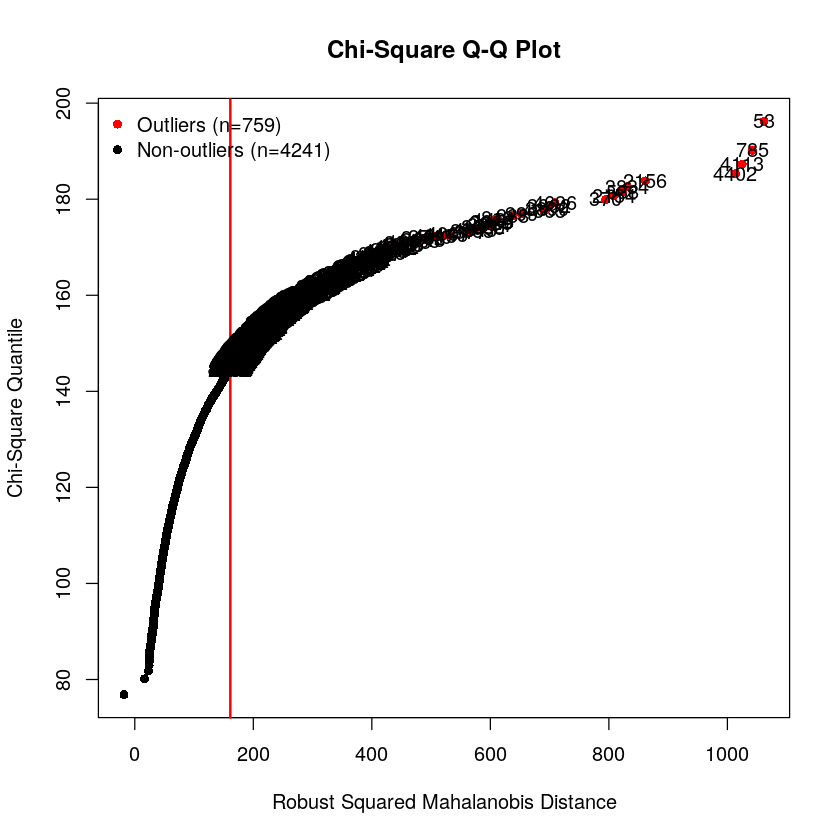

In [12]:
result <- mvn(data = alt, mvnTest = "hz", multivariateOutlierMethod = "quan", showOutliers = TRUE, showNewData = TRUE)
outlier_free <- result$newData

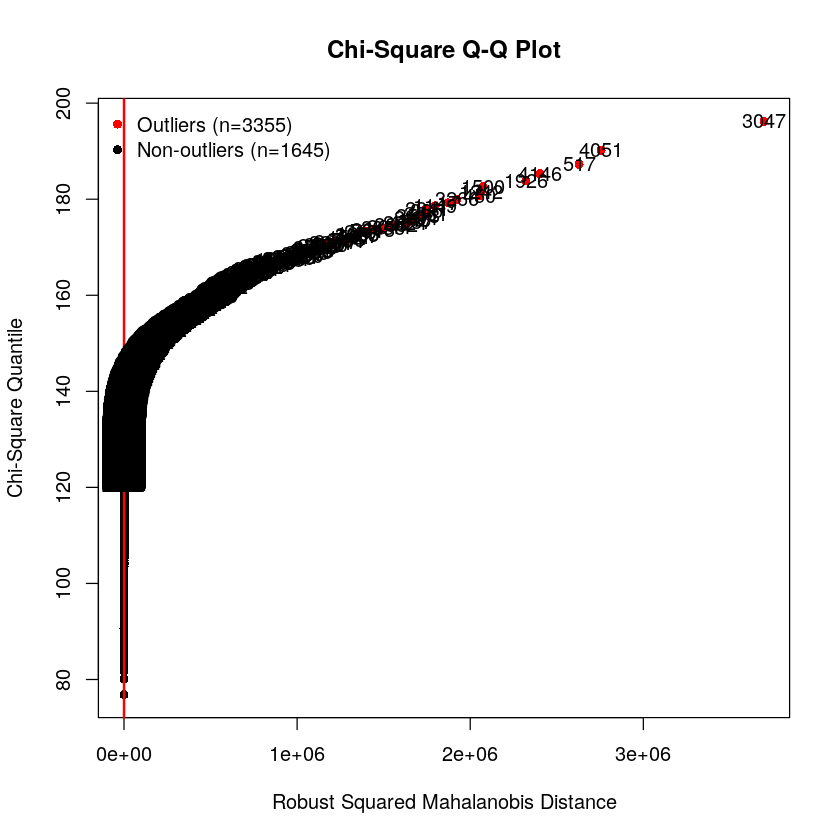

In [13]:
test_gan <- data.frame(gan_data)[1:5000,1:128]
result2 <- mvn(data = test_gan, mvnTest = "hz", multivariateOutlierMethod = "quan", showOutliers = TRUE, showNewData = TRUE)
gan_outlier_free <- result2$newData

In [14]:
indice <- dim(gan_outlier_free)[1]

In [18]:
a1 <- as.matrix(outlier_free[1:200,1:128])
a2 <- as.matrix(gan_outlier_free[1:200,1:128])

wilcox.test(a1,a2)


	Wilcoxon rank sum test with continuity correction

data:  a1 and a2
W = 226150000, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0
